# IMPORTS

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Exercise 1

In 5.1 the new field appeared at the bottom of the entry. Modify this program so that it inserts the new subelement right after the lx field. (Hint: create the new cv field using Element('cv'), assign a text value to it, then use the insert() method of the parent element.)

In [30]:
from xml.etree.ElementTree import SubElement, Element
from nltk.corpus import toolbox

In [31]:
def cv(s):
    s = s.lower()
    s = re.sub(r'[^a-z]', r'_', s)
    s = re.sub(r'[aeiou]', r'V', s)
    s = re.sub(r'[^V_]', r'C', s)
    return (s)

In [32]:
def add_cv_field(entry):
    for i, field in enumerate(entry):
        if field.tag == 'lx':
            cv_field = Element('cv')
            cv_field.text = cv(field.text)
            entry.insert(i + 1, cv_field)

In [33]:
lexicon = toolbox.xml('rotokas.dic')
add_cv_field(lexicon[53])
print(nltk.toolbox.to_sfm_string(lexicon[53]))

\lx kaeviro
\cv CVVCVCV
\ps V
\pt A
\ge lift off
\ge take off
\tkp go antap
\sc MOTION
\vx 1
\nt used to describe action of plane
\dt 03/Jun/2005
\ex Pita kaeviroroe kepa kekesia oa vuripierevo kiuvu.
\xp Pita i go antap na lukim haus win i bagarapim.
\xe Peter went to look at the house that the wind destroyed.



# Exercise 2

Write a function that deletes a specified field from a lexical entry. (We could use this to sanitize our lexical data before giving it to others, e.g. by removing fields containing irrelevant or uncertain content.)

In [218]:
from nltk.corpus import toolbox
from xml.etree.ElementTree import SubElement, Element

In [219]:
def remove_field(entry, field_tag):
    for field in entry.findall(field_tag):
        entry.remove(field)

In [220]:
lexicon = toolbox.xml('rotokas.dic')

In [221]:
entry = lexicon[53]
remove_field(entry, 'ge')
print(nltk.toolbox.to_sfm_string(entry))

\lx kaeviro
\ps V
\pt A
\tkp go antap
\sc MOTION
\vx 1
\nt used to describe action of plane
\dt 03/Jun/2005
\ex Pita kaeviroroe kepa kekesia oa vuripierevo kiuvu.
\xp Pita i go antap na lukim haus win i bagarapim.
\xe Peter went to look at the house that the wind destroyed.



# Exercise 3

Write a program that scans an HTML dictionary file to find entries having an illegal part-of-speech field, and reports the headword for each entry.

In [265]:
from nltk.corpus import toolbox

In [266]:
def find_illegal_pos(lexicon, valid_pos=['N', 'V', 'ADV']):
    headwords = []
    for entry in lexicon:
        ps = entry.find('ps')
        if isinstance(ps, Element) and ps.text not in valid_pos:
            headwords.append(entry.find('lx').text)
    return headwords

In [267]:
lexicon = toolbox.xml('rotokas.dic')

In [268]:
find_illegal_pos(lexicon)[:10]

['kaakaavo',
 'kaapea',
 'kaapo',
 'kaare',
 'kaekae',
 'kaereasi',
 'kaetu',
 'kakae',
 'kakae',
 'kakapikoa']

# Exercise 4

Write a program to find any parts of speech (ps field) that occurred less than ten times. Perhaps these are typing mistakes?

In [269]:
from nltk.corpus import toolbox

In [270]:
def find_rare_pos(lexicon, n=10):
    fd = nltk.FreqDist(
        field.text
        for entry in lexicon
        for field in entry
        if field.tag == 'ps'
    )
    return [t for t, c in fd.items() if c < n]

In [271]:
lexicon = toolbox.xml('rotokas.dic')

In [272]:
find_rare_pos(lexicon)

['CLASS', 'FFP', 'NUM', 'POST', 'EXCL']

# Exercise 5

We saw a method for discovering cases of whole-word reduplication. Write a function to find words that may contain partial reduplication. Use the re.search() method, and the following regular expression: (..+)\1

In [10]:
from nltk.corpus import words

In [11]:
def partial_reduplication(words):
    return [w for w in words if re.search(r'(..+)\1', w)]

In [13]:
partial_reduplication_words(words.words())[:10]

['ablatitious',
 'abstractitious',
 'acacatechin',
 'acacatechol',
 'acacetin',
 'acaciin',
 'acacin',
 'acarodermatitis',
 'acatastasia',
 'acclimatation']

# Exercise 6

We saw a method for adding a cv field. There is an interesting issue with keeping this up-to-date when someone modifies the content of the lx field on which it is based. Write a version of this program to add a cv field, replacing any existing cv field.

In [273]:
from xml.etree.ElementTree import SubElement
from nltk.corpus import toolbox

In [274]:
def cv(s):
    s = s.lower()
    s = re.sub(r'[^a-z]', r'_', s)
    s = re.sub(r'[aeiou]', r'V', s)
    s = re.sub(r'[^V_]', r'C', s)
    return (s)

In [275]:
def add_cv_field(entry):
    remove_field(entry, 'cv')
    for i, field in enumerate(entry):
        if field.tag == 'lx':
            cv_field = Element('cv')
            cv_field.text = cv(field.text)
            entry.insert(i + 1, cv_field)

In [276]:
lexicon = toolbox.xml('rotokas.dic')

In [277]:
entry = lexicon[53]
add_cv_field(entry)
print(nltk.toolbox.to_sfm_string(entry))

\lx kaeviro
\cv CVVCVCV
\ps V
\pt A
\ge lift off
\ge take off
\tkp go antap
\sc MOTION
\vx 1
\nt used to describe action of plane
\dt 03/Jun/2005
\ex Pita kaeviroroe kepa kekesia oa vuripierevo kiuvu.
\xp Pita i go antap na lukim haus win i bagarapim.
\xe Peter went to look at the house that the wind destroyed.



# Exercise 7

Write a function to add a new field syl which gives a count of the number of syllables in the word.

In [24]:
from nltk.corpus import cmudict

In [25]:
cmu = cmudict.dict()

In [26]:
def nsyl(w):
    return [len([s for s in pron if s[-1].isdigit()]) 
            for pron in cmu[w.lower()]]            

In [27]:
def add_syl_field(entry):
    remove_field(entry, 'syl')
    for i, field in enumerate(entry):
        if field.tag == 'lx':
            cv_field = Element('nsyl')
            cv_field.text = nsyl(field.text)
            entry.insert(i + 1, cv_field)

# Exercise 8

Write a function which displays the complete entry for a lexeme. When the lexeme is incorrectly spelled it should display the entry for the most similarly spelled lexeme.

# Exercise 9

Write a function that takes a lexicon and finds which pairs of consecutive fields are most frequent (e.g. ps is often followed by pt). (This might help us to discover some of the structure of a lexical entry.)

In [286]:
from nltk.corpus import toolbox

In [287]:
def get_freq_tag_pairs(lexicon, n=10):
    return nltk.FreqDist(
        (f1.tag, f2.tag)
        for entry in lexicon
        for f1, f2 in nltk.bigrams(entry)
    ).most_common(10)

In [44]:
lexicon = toolbox.xml('rotokas.dic')

In [289]:
get_freq_tag_pairs(lexicon)

[(('ex', 'xp'), 1532),
 (('xp', 'xe'), 1526),
 (('ps', 'pt'), 835),
 (('ge', 'tkp'), 824),
 (('pt', 'ge'), 766),
 (('dt', 'ex'), 758),
 (('xe', 'ex'), 708),
 (('lx', 'ps'), 520),
 (('rt', 'ps'), 356),
 (('tkp', 'dt'), 327)]

# Exercise 10

Create a spreadsheet using office software, containing one lexical entry per row, consisting of a headword, a part of speech, and a gloss. Save the spreadsheet in CSV format. Write Python code to read the CSV file and print it in Toolbox format, using lx for the headword, ps for the part of speech, and gl for the gloss.

In [73]:
from nltk.corpus import toolbox
from xml.etree.ElementTree import Element

In [74]:
%%file ex10.csv
kaa,V,gag
kaakaaro,N,mixture
kaakaaviko,N,type of beetle

Writing ex10.csv


In [75]:
def csv2tlbx(path):
    df = pd.read_csv(path, names=['lx', 'ps', 'gl'])
    dictionary = Element('dictionary')
    for _, row in df.iterrows():
        record = Element('record')
        for item, value in row.iteritems():
            field = Element(item)
            field.text = value
            record.append(field)
        dictionary.append(record)
    return dictionary

In [76]:
dictionary = csv2tlbx('ex10.csv')

In [77]:
print(nltk.toolbox.to_sfm_string(dictionary[0]))

\lx kaa
\ps V
\gl gag



In [78]:
!rm ex10.csv

# Exercise 11

Index the words of Shakespeare's plays, with the help of nltk.Index. The resulting data structure should permit lookup on individual words such as music, returning a list of references to acts, scenes and speeches, of the form [(3, 2, 9), (5, 1, 23), ...], where (3, 2, 9) indicates Act 3 Scene 2 Speech 9.

In [349]:
from nltk.corpus import shakespeare
from xml.etree.ElementTree import ElementTree

In [350]:
merchant_file = nltk.data.find('corpora/shakespeare/merchant.xml')
merchant = ElementTree().parse(merchant_file)

In [351]:
merchant_index = nltk.Index(
    (word.lower(), (i, j, k))
    for i, act in enumerate(merchant.findall('ACT'), 1)
    for j, scene in enumerate(act.findall('SCENE'), 1)
    for k, speech in enumerate(scene.findall('SPEECH'), 1)
    for line in speech.findall('LINE') if line.text
    for word in nltk.word_tokenize(line.text) if word.isalpha()
)
merchant_index = {k: sorted(set(v)) 
                  for k, v in merchant_index.items()}

In [352]:
merchant_index['music']

[(3, 2, 9), (5, 1, 23), (5, 1, 24), (5, 1, 25), (5, 1, 28), (5, 1, 29)]

# Exercise 12

Construct a conditional frequency distribution which records the word length for each speech in The Merchant of Venice, conditioned on the name of the character, e.g. cfd['PORTIA'][12] would give us the number of speeches by Portia consisting of 12 words.

In [370]:
from nltk.corpus import shakespeare
from xml.etree.ElementTree import ElementTree

In [371]:
merchant_file = nltk.data.find('corpora/shakespeare/merchant.xml')
merchant = ElementTree().parse(merchant_file)

In [375]:
cfd = nltk.ConditionalFreqDist(
    (speech.find('SPEAKER').text.upper(),
     len([word 
         for word in nltk.word_tokenize(line.text) 
         if word.isalpha()]))
    for act in merchant.findall('ACT')
    for scene in act.findall('SCENE')
    for speech in scene.findall('SPEECH')
    for line in speech.findall('LINE') if line.text
)

In [376]:
cfd['PORTIA'][12]

6

# Exercise 13

Obtain a comparative wordlist in CSV format, and write a program that prints those cognates having an edit-distance of at least three from each other.

# Exercise 14

Build an index of those lexemes which appear in example sentences. Suppose the lexeme for a given entry is w. Then add a single cross-reference field xrf to this entry, referencing the headwords of other entries having example sentences containing w. Do this for all entries and save the result as a toolbox-format file.

# Exercise 15

Write a recursive function to produce an XML representation for a tree, with non-terminals represented as XML elements, and leaves represented as text content, e.g.:

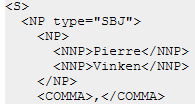